In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###READING DATA
d1 = np.load("data_173103.npy")
d2 = np.load("data_173307.npy")
d3 = np.load("data_173318.npy")
d4 = np.load("data_173329.npy")
d5 = np.load("data_173354.npy")
d6 = np.load("data_173403.npy")
print d6.shape
data = np.vstack((d1, d2, d3, d4, d5, d6))
print data.shape

(6000, 2)
(36000, 2)


In [3]:
def RMS(s, data): 
    rms = []        
    v = np.arange(0, data.shape[0], data.shape[0]/s)
    for i in v:     
        rms.append(np.sqrt(np.mean(np.square(data[i:i+s]))))
    return np.array(rms)



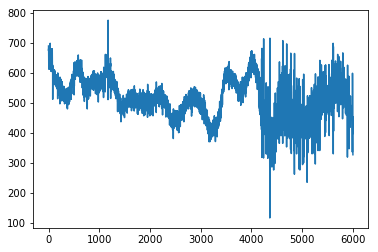

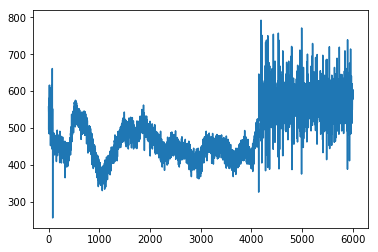

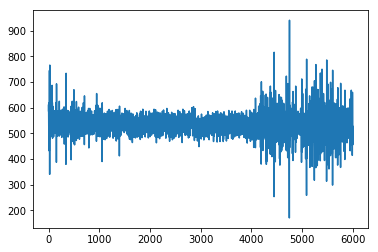

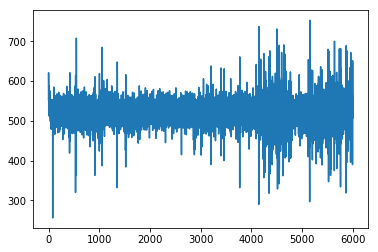

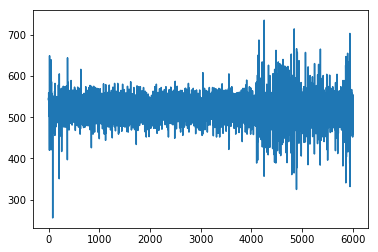

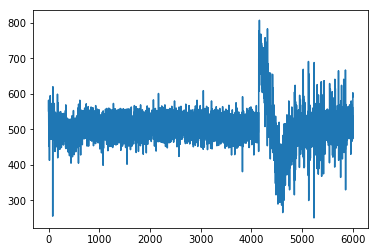

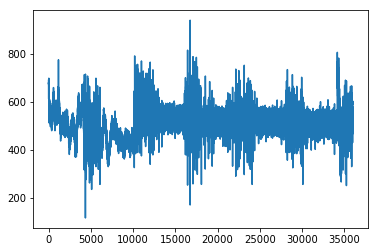

In [11]:
#plotting
plt.plot(d1[:, 0])
plt.show()
plt.plot(d2[:, 0])
plt.show()
plt.plot(d3[:, 0])
plt.show()
plt.plot(d4[:, 0])
plt.show()
plt.plot(d5[:, 0])
plt.show()
plt.plot(d6[:, 0])
plt.show()
##all data
plt.plot(data[:,0])
plt.show()


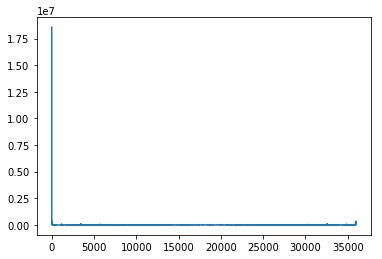

In [19]:
###showing the freqs
D = np.abs(np.fft.fft(data[:,0]))
plt.plot(D)
plt.show()

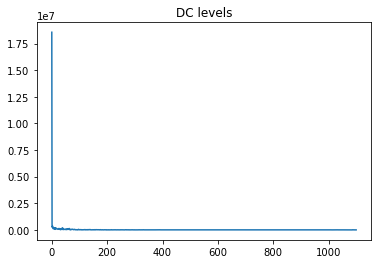

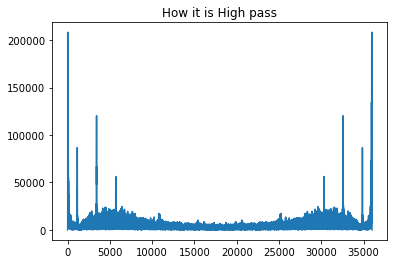

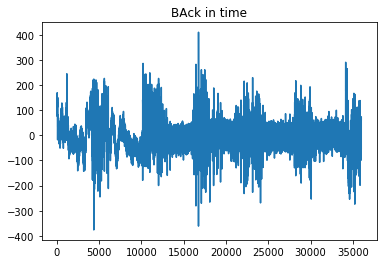

Remaing DC Level now (better than averaging): 8.08439734909e-16
Remaing DC Level then: -2.49605768153e-14


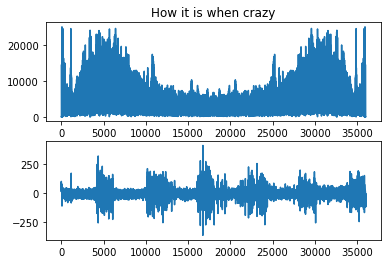

In [52]:
##filtering out the data
#removing DC
d_nodc = data[:,0] - data[:,0].mean()
#D_ = np.abs(np.fft.fft(D_nodc))
plt.plot(D[:1100])
plt.title("DC levels")
plt.show()

Df = np.fft.fft(data[:,0])
#passa alta
s_kernel = 4
kernel = np.hstack((np.zeros(s_kernel),np.ones(Df.shape[0]- 2*s_kernel), np.zeros(s_kernel)))
#plt.plot(D, c='b')
#plt.plot(kernel, c='r')
#plt.title("How it's gonna be")
#plt.show()

D_pa = np.multiply(kernel, Df)
plt.plot(np.abs(D_pa))
plt.title("How it is High pass")
plt.show()
##BACK TO TIME
d_pa = np.fft.ifft(D_pa).real
plt.plot(d_pa)
plt.title("BAck in time")
plt.show()
print "Remaing DC Level now (better than averaging):", d_pa.mean()
print "Remaing DC Level then:", d_nodc.mean()

#CRAZY filter
D_c = D_pa
for i in xrange(D_c.shape[0]):
    if abs(D_c[i]) >25000: D_c[i] = 0
d_c = np.fft.ifft(D_c).real
plt.subplot(211)        
plt.plot(np.abs(D_c))
plt.title("How it is when crazy")
plt.subplot(212)        
plt.plot(d_c)
plt.show()

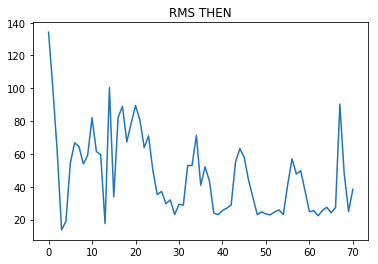

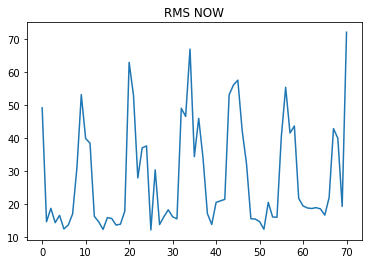

In [56]:
##SEEING THE RMS VALUES FOR THE DIFFERENT FILTERS
plt.plot(RMS(d_nodc.shape[0]/512, d_nodc))
plt.title("RMS THEN")
plt.show()
plt.plot(RMS(d_c.shape[0]/512, d_c))
plt.title("RMS NOW")
plt.show()

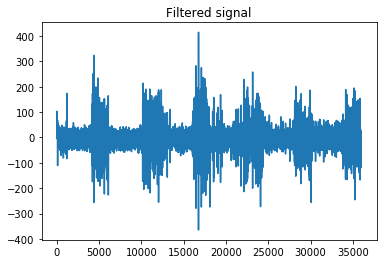

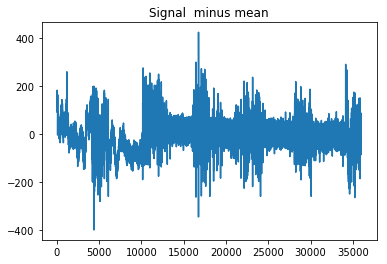

In [57]:
#Comparing the signal filtered with the one from witch only the mean was removed
plt.plot(d_c)
plt.title("Filtered signal")
plt.show()

plt.plot(d_nodc)
plt.title("Signal  minus mean")
plt.show()

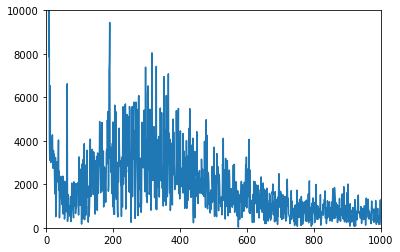

In [16]:
f = np.linspace(0, 2000, 2000)
d = d1[:,0] - d1[:,0].mean()
plt.plot(f, np.abs(np.fft.fft(d[4000:])))
plt.xlim(0, 1000)
plt.ylim(0, 10000)
plt.show()
